<a href="https://colab.research.google.com/github/Hadrien-Cornier/Crystal_Contract/blob/master/all_polynomials_from_relus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from typing import Callable

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#matplotlib.use('MacOSX')  # Replace 'TkAgg' with your preferred backend

# The goal is to express all polynomials with a neural network that only uses relu activation functions
# many thanks to Nikolaj-K @ https://www.youtube.com/watch?v=PApGm1TKFHQ for the topic
# rewrote it in a different way

In [77]:
def R(x: np.ndarray) -> np.ndarray:
    """
    Relu
    :param x: 1D array in R^n
    :return: Relu(x) 1D array in R^n
    """
    return np.maximum(x, 0)


def T(x: np.ndarray) -> np.ndarray:
    """
    Triangle
    """
    return -R(x) - R(-x) + 1. / 2


def M(t: Callable[[np.ndarray], np.ndarray]) -> Callable[[np.ndarray], np.ndarray]:
    """
    Minification function (takes a triangle T and turns it into a double triangle M(T))
    :param t: the triangle function
    :return:
    """
    return lambda x: t(2 * x + 1) + t(2 * x - 1)


def plot(x: np.ndarray) -> None:
    """
    Curries X into the plot function
    """
    def fn(y: np.ndarray, label: str, color: str) -> None:
        plt.plot(x, y, label=label, color=color)
    return lambda y,label,color : fn(y,label,color)


def plt_setup() -> None:
    plt.grid(True)
    plt.style.use('dark_background')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.legend(loc='best')
    plt.title("getting $-2*X^2+1/2$ from Relus is the goal")
    plt.style.use('dark_background')
    return None

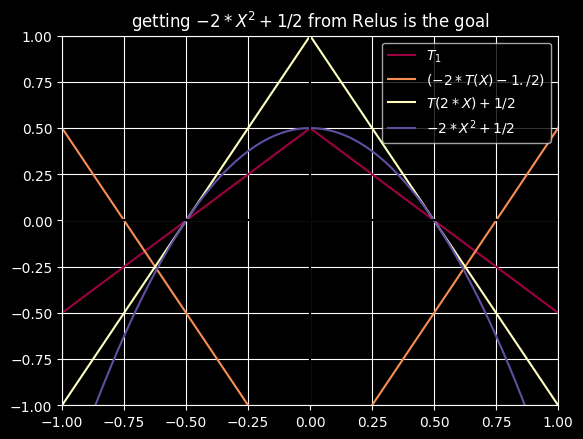

In [82]:
# Our map is the square of all x,y s.t. x in [-0.5,0.5] and y in [0.0,0.5]
# This is shifted from Nikolaj-K's video where he uses [0,1]x[0,1]
# imo this makes it easier to understand

# We want to express the square function in terms of relus and linear combinations
# essentiually we want to see -x**2+0.5
color_cycle = matplotlib.colormaps["Spectral"]
X = np.linspace(-1., 1., 10000)
Y = T(X)
prt = plot(X)
assert Y.max() <= 1. and Y.min() >= -1.
prt(T(X),"$T_1$", color=color_cycle(0.0))
prt(-2*T(X)-1./2, "$(-2*T(X)-1./2)$", color=color_cycle(0.25))
prt(-2*T(X)-1./2, "$(-2*T(X)-1./2)$", color=color_cycle(0.25))

prt(T(2 * X)+1./2, "$T(2 * X)+1/2$", color=color_cycle(0.5))

prt(-2*X**2 + 1./2, "$-2*X^2+1/2$", color=color_cycle(1.0))

plt_setup()
plt.show()

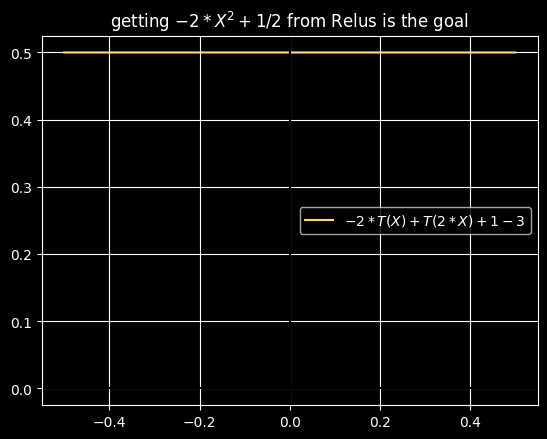

In [69]:
# Our map is the square of all x,y s.t. x in [-0.5,0.5] and y in [0.0,0.5]
# This is shifted from Nikolaj-K's video where he uses [0,1]x[0,1]
# imo this makes it easier to understand

# We want to express the square function in terms of relus and linear combinations
# essentiually we want to see -x**2+0.5
color_cycle = matplotlib.colormaps["Spectral"]
X = np.linspace(-0.5, 0.5, 10000)
Y = T(X)
prt = plot(X)
assert Y.max() <= 0.5 and Y.min() >= -0.5
# prt(-2*T(X)+1./2, "$-T(X)+1/2$", color=color_cycle(0.25))
# prt(T(2 * X)+1./2, "$T(2 * X)+1/2$", color=color_cycle(0.5))
prt(-2*T(X)+1./2 + T(2 * X)+1./2, "$-2*T(X)+T(2 * X)+1-3$",color=color_cycle(0.75/2.0) )

plt_setup()
plt.show()
